In [1]:
import os

os.chdir("../..")

In [17]:
from src.shared.storage import Database, ImageStorage, DataFrameStorage

image_storage = ImageStorage("cgc/classification", db=Database.SHARED_CGC)
df_storage = DataFrameStorage("cgc/classification", db=Database.SHARED_CGC)

df = df_storage.get("cards")
fossil_df = df[df["label"].str.contains("English_Fossil")][
    df["label"].str.contains("_Holo") == False
]
fossil_df.head()

/var/folders/x_/mr86sn6n2jd09sz6rz6z8dk00000gn/T/ipykernel_59419/2215037711.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fossil_df = df[df["label"].str.contains("English_Fossil")][df["label"].str.contains("_Holo") == False]


Unnamed: 0      cert_#  \
264         264  4081109001   
352         352  4125232001   
531         531  4126385001   
532         532  4126385002   
533         533  4126385003   

                                                 label  \
264  2000_English_Fossil - Unlimited_17/62_Articuno...   
352  1999_English_Fossil - 1st Edition_21/62_Haunte...   
531  1999_English_Fossil - 1st Edition_58/62_Mr. Fu...   
532  1999_English_Fossil - 1st Edition_59/62_Energy...   
533  1999_English_Fossil - 1st Edition_59/62_Energy...   

                                            image_path  
264  ./db/shared-cgc/jpg/cgc/classification/0_40811...  
352  ./db/shared-cgc/jpg/cgc/classification/0_41252...  
531  ./db/shared-cgc/jpg/cgc/classification/0_41263...  
532  ./db/shared-cgc/jpg/cgc/classification/0_41263...  
533  ./db/shared-cgc/jpg/cgc/classification/0_41263...

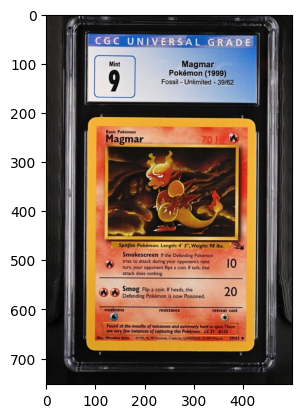

In [18]:
from src.shared.image import display_image
from PIL import Image

image = Image.open(fossil_df.iloc[200]["image_path"])

display_image(image)

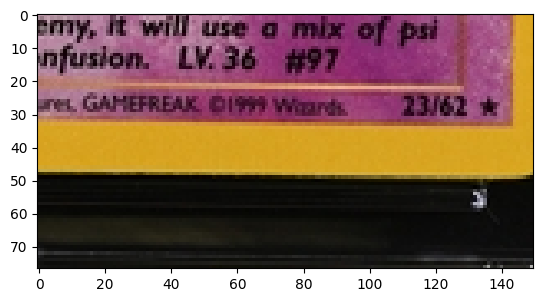

In [29]:
from src.shared.image import crop_image

image = Image.open(fossil_df.iloc[300]["image_path"])
display_image(crop_image(image, top=0.85, right=0.2, bottom=0.05, left=0.5))

In [4]:
import cv2

image1 = cv2.imread('db/local/jpg/imakuni-tmb.jpg')
image2 = cv2.imread('db/local/jpg/imakuni.jpg')

difference = cv2.subtract(image1, image2)

_, difference = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)

cv2.imshow('Difference', difference)

[ WARN:0@39.966] global loadsave.cpp:244 findDecoder imread_('db/local/jpg/imakuni-tmb.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
